<a href="https://colab.research.google.com/github/pujari912/Intermediate-GitHub-Test-Repo/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Install required libraries
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 2: Data Generation (in case unable to download real data)
def generate_startup_data(num_records=1000):
    np.random.seed(42)

    # Define possible values for categorical columns
    companies = [f"Startup_{i}" for i in range(1, 101)]
    industries = ['Fintech', 'HealthTech', 'AI/ML', 'E-commerce', 'SaaS',
                 'CleanTech', 'EdTech', 'Biotech', 'Cybersecurity', 'IoT']
    locations = ['Silicon Valley', 'New York', 'London', 'Berlin', 'Singapore',
                'Tel Aviv', 'Bangalore', 'Beijing', 'Tokyo', 'Toronto']
    investors = ['VC_A', 'VC_B', 'VC_C', 'VC_D', 'Angel_1', 'Angel_2',
                'PE_Firm_1', 'PE_Firm_2', 'CVC_1', 'CVC_2']
    funding_rounds = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D']

    # Generate random data
    data = {
        'date': pd.date_range(start='2020-01-01', end='2023-12-31', periods=num_records),
        'company_name': np.random.choice(companies, num_records),
        'industry': np.random.choice(industries, num_records),
        'location': np.random.choice(locations, num_records),
        'funding_round': np.random.choice(funding_rounds, num_records),
        'amount_raised': np.random.lognormal(mean=15, sigma=1.5, size=num_records).astype(int),
        'lead_investor': np.random.choice(investors, num_records),
        'co_investors': [np.random.randint(0, 5) for _ in range(num_records)],
        'valuation': np.random.lognormal(mean=16, sigma=2, size=num_records).astype(int)
    }

    df = pd.DataFrame(data)

    # Add some realistic touches
    df['amount_raised'] = df['amount_raised'].clip(upper=1000000000)  # Cap at $1B
    df['valuation'] = df['valuation'].clip(upper=10000000000)  # Cap at $10B
    df.loc[df['funding_round'] == 'Seed', 'amount_raised'] //= 10  # Smaller seed rounds
    df.loc[df['funding_round'] == 'Series A', 'amount_raised'] //= 5  # Smaller A rounds
    print(df)

    return df

In [7]:
# Step 3: Create or load dataset
try:
    # Try to load real data (you can replace this URL with any other dataset)
    url = "https://raw.githubusercontent.com/your_username/your_repo/main/startup_funding.csv"
    df = pd.read_csv(url)
except:
    print("Using generated dataset instead of real data...")
    df = generate_startup_data(1000)

Using generated dataset instead of real data...
                             date company_name    industry        location  \
0   2020-01-01 00:00:00.000000000   Startup_52  HealthTech        Tel Aviv   
1   2020-01-02 11:04:30.270270270   Startup_93     Biotech       Singapore   
2   2020-01-03 22:09:00.540540540   Startup_15     Biotech        Tel Aviv   
3   2020-01-05 09:13:30.810810810   Startup_72     Fintech        New York   
4   2020-01-06 20:18:01.081081081   Startup_61       AI/ML  Silicon Valley   
..                            ...          ...         ...             ...   
995 2023-12-25 03:41:58.918918912   Startup_10  HealthTech          London   
996 2023-12-26 14:46:29.189189184   Startup_67        SaaS          Berlin   
997 2023-12-28 01:50:59.459459456   Startup_18     Fintech         Beijing   
998 2023-12-29 12:55:29.729729728  Startup_100      EdTech        Tel Aviv   
999 2023-12-31 00:00:00.000000000   Startup_86     Biotech       Singapore   

    funding_rou

In [8]:
# Step 4: Data Analysis and Visualization Class
class StartupEcosystemAnalyzer:
    def __init__(self, data):
        self.df = data
        self.df['year'] = pd.to_datetime(self.df['date']).dt.year
        self.df['month'] = pd.to_datetime(self.df['date']).dt.month

    def funding_overview(self):
        """Generate basic funding statistics"""
        stats = {
            'Total Funding': f"${self.df['amount_raised'].sum():,.0f}",
            'Average Round Size': f"${self.df['amount_raised'].mean():,.0f}",
            'Number of Deals': len(self.df),
            'Unique Companies': self.df['company_name'].nunique(),
            'Date Range': f"{self.df['date'].min()} to {self.df['date'].max()}"
        }
        return pd.Series(stats)

    def plot_funding_trends(self):
        """Create comprehensive funding trends visualization"""
        plt.figure(figsize=(20, 15))

        # Plot 1: Yearly Funding Trends
        plt.subplot(2, 2, 1)
        yearly_funding = self.df.groupby('year')['amount_raised'].sum() / 1e6
        yearly_funding.plot(kind='bar', color='skyblue')
        plt.title('Total Funding by Year (in millions USD)')
        plt.ylabel('Funding Amount (M)')
        plt.xticks(rotation=45)

        # Plot 2: Industry Distribution
        plt.subplot(2, 2, 2)
        industry_funding = self.df.groupby('industry')['amount_raised'].sum()
        plt.pie(industry_funding, labels=industry_funding.index, autopct='%1.1f%%')
        plt.title('Funding Distribution by Industry')

        # Plot 3: Average Round Size by Stage
        plt.subplot(2, 2, 3)
        round_sizes = self.df.groupby('funding_round')['amount_raised'].mean() / 1e6
        round_sizes.plot(kind='bar', color='lightgreen')
        plt.title('Average Round Size by Stage (in millions USD)')
        plt.ylabel('Average Amount (M)')
        plt.xticks(rotation=45)

        # Plot 4: Top Funding Locations
        plt.subplot(2, 2, 4)
        location_funding = self.df.groupby('location')['amount_raised'].sum().sort_values(ascending=False)[:10]
        location_funding.plot(kind='barh', color='salmon')
        plt.title('Top 10 Funding Locations')
        plt.xlabel('Total Funding Amount')

        plt.tight_layout()
        plt.show()

    def investor_analysis(self):
        """Analyze investor activities"""
        # Top investors by number of deals
        top_investors = self.df['lead_investor'].value_counts().head(10)

        plt.figure(figsize=(12, 6))
        top_investors.plot(kind='bar')
        plt.title('Top 10 Most Active Investors')
        plt.xlabel('Investor')
        plt.ylabel('Number of Deals')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return top_investors

    def funding_stage_analysis(self):
        """Analyze funding stages"""
        stage_analysis = self.df.groupby('funding_round').agg({
            'amount_raised': ['count', 'mean', 'sum'],
            'valuation': 'mean'
        })

        stage_analysis.columns = ['Deal Count', 'Avg Round Size', 'Total Funding', 'Avg Valuation']
        return stage_analysis


=== Startup Ecosystem Overview ===
Total Funding                                     $7,751,388,621
Average Round Size                                    $7,751,389
Number of Deals                                             1000
Unique Companies                                             100
Date Range            2020-01-01 00:00:00 to 2023-12-31 00:00:00
dtype: object

=== Funding Trends Visualization ===


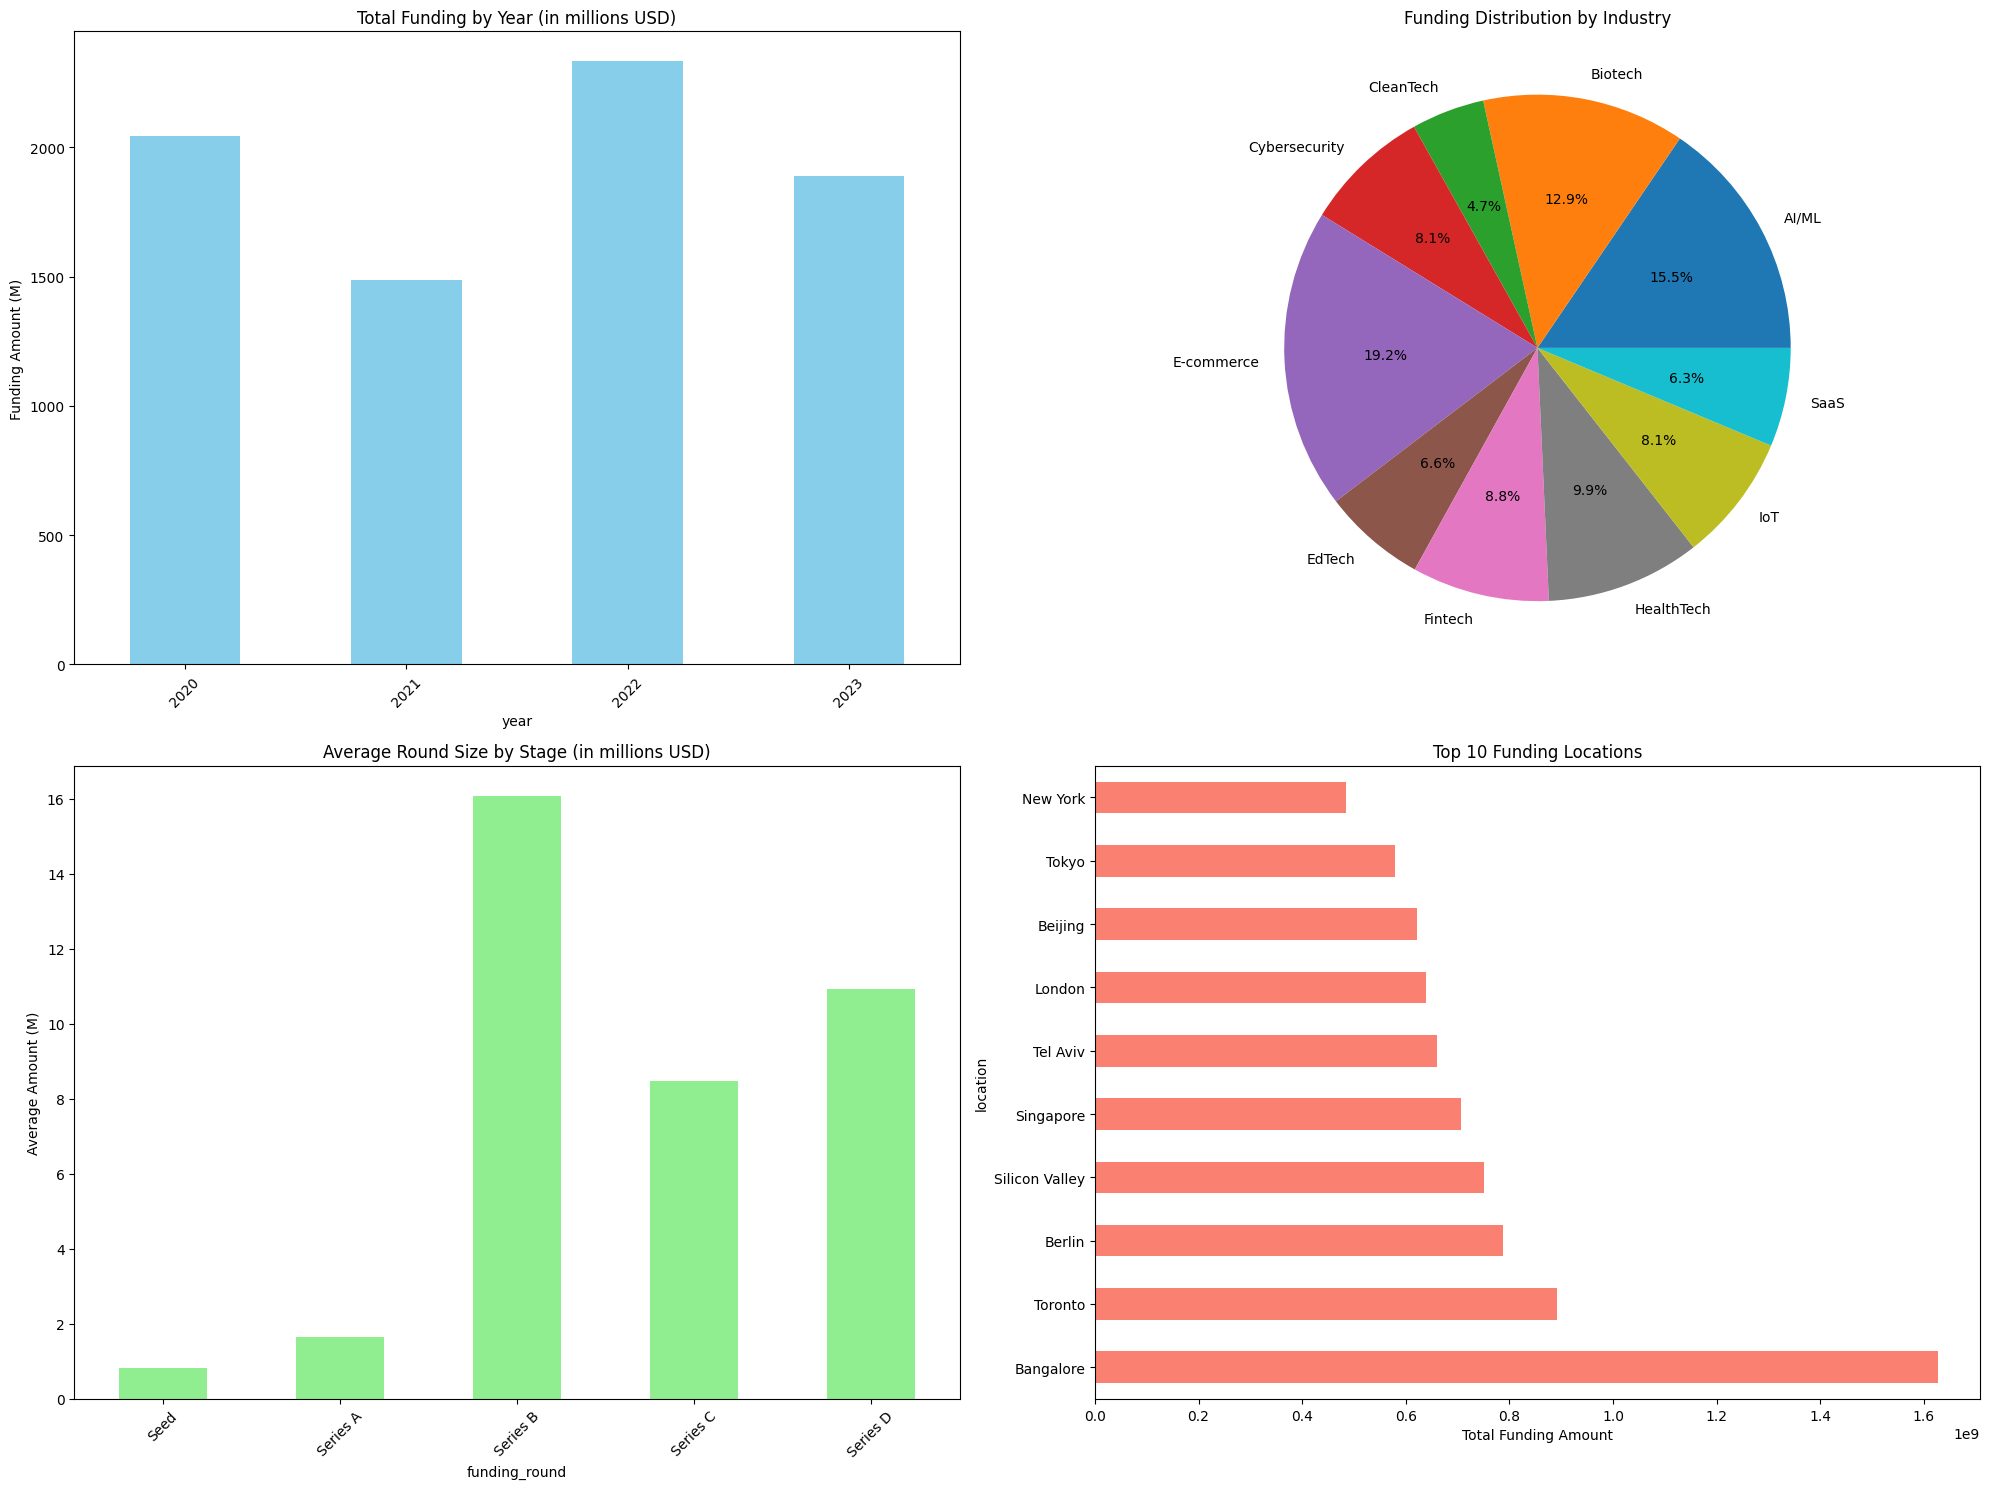


=== Top Investors Analysis ===


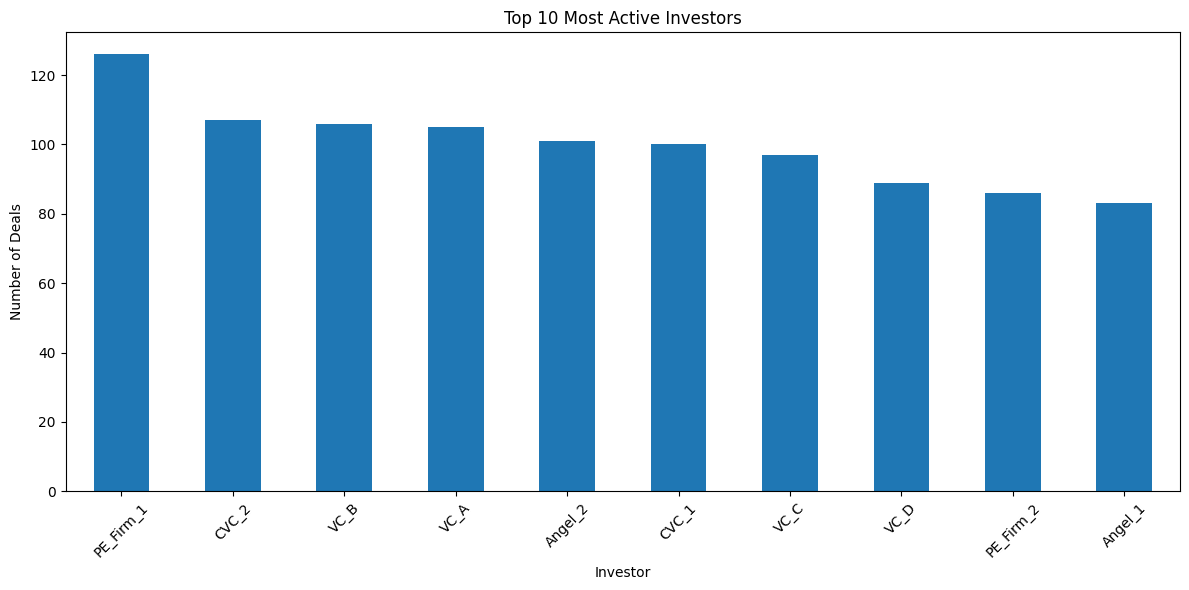

lead_investor
PE_Firm_1    126
CVC_2        107
VC_B         106
VC_A         105
Angel_2      101
CVC_1        100
VC_C          97
VC_D          89
PE_Firm_2     86
Angel_1       83
Name: count, dtype: int64

=== Funding Stage Analysis ===
               Deal Count  Avg Round Size  Total Funding  Avg Valuation
funding_round                                                          
Seed                  215    8.346173e+05      179442709   5.887272e+07
Series A              169    1.648014e+06      278514398   4.027050e+07
Series B              204    1.607795e+07     3279902000   5.088635e+07
Series C              200    8.473185e+06     1694637044   4.709567e+07
Series D              212    1.093817e+07     2318892470   5.408572e+07


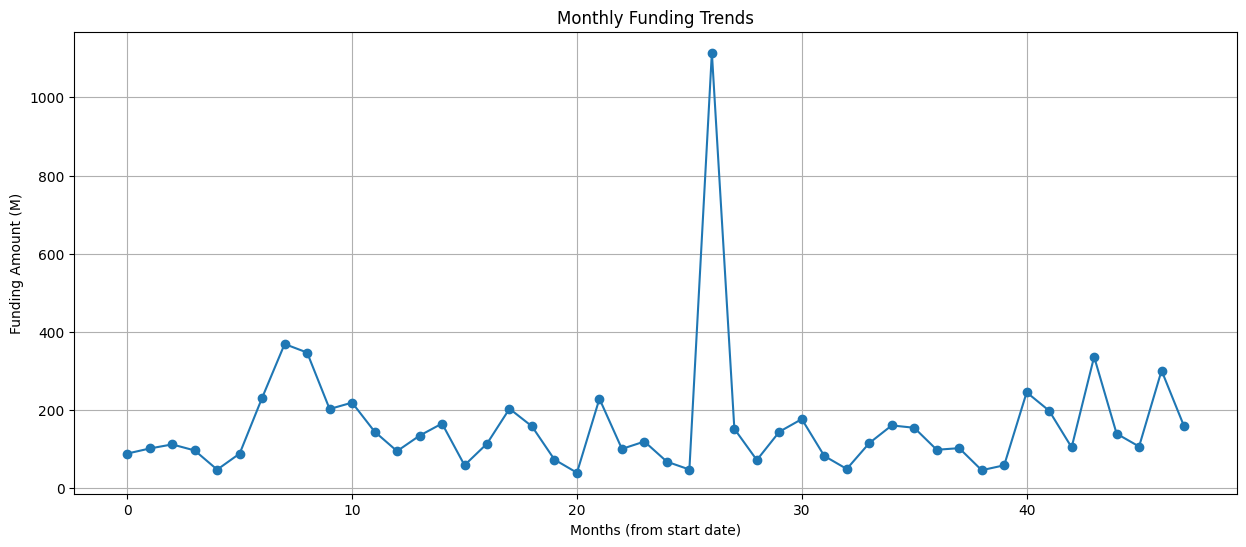


=== Industry Success Metrics ===
               Avg Round Size  Number of Deals  Total Funding  Avg Valuation
industry                                                                    
AI/ML             12256277.62               98     1201115207    39635944.80
Biotech            8958160.38              112     1003313962    59115648.42
CleanTech          3546312.09              102      361723833    49329144.03
Cybersecurity      6604633.14               95      627440148    34393127.96
E-commerce        16141132.40               92     1484984181    88511402.92
EdTech             5437249.56               94      511101459    25388152.74
Fintech            6411453.84              106      679614107    31246261.32
HealthTech         7205870.80              106      763822305    73755137.44
IoT                6696922.34               94      629510700    39882948.12
SaaS               4839234.84              101      488762719    64520735.34


In [9]:
# Step 5: Run the analysis
analyzer = StartupEcosystemAnalyzer(df)

# Display basic overview
print("\n=== Startup Ecosystem Overview ===")
print(analyzer.funding_overview())

# Generate visualizations
print("\n=== Funding Trends Visualization ===")
analyzer.plot_funding_trends()

# Display investor analysis
print("\n=== Top Investors Analysis ===")
print(analyzer.investor_analysis())

# Display funding stage analysis
print("\n=== Funding Stage Analysis ===")
print(analyzer.funding_stage_analysis())

# Step 6: Additional Insights
# Monthly funding trend
plt.figure(figsize=(15, 6))
monthly_funding = df.groupby(['year', 'month'])['amount_raised'].sum().reset_index()
plt.plot(range(len(monthly_funding)), monthly_funding['amount_raised'] / 1e6, marker='o')
plt.title('Monthly Funding Trends')
plt.xlabel('Months (from start date)')
plt.ylabel('Funding Amount (M)')
plt.grid(True)
plt.show()

# Industry success metrics
industry_metrics = df.groupby('industry').agg({
    'amount_raised': ['mean', 'count', 'sum'],
    'valuation': 'mean'
}).round(2)
industry_metrics.columns = ['Avg Round Size', 'Number of Deals', 'Total Funding', 'Avg Valuation']
print("\n=== Industry Success Metrics ===")
print(industry_metrics)

Generating visualizations...


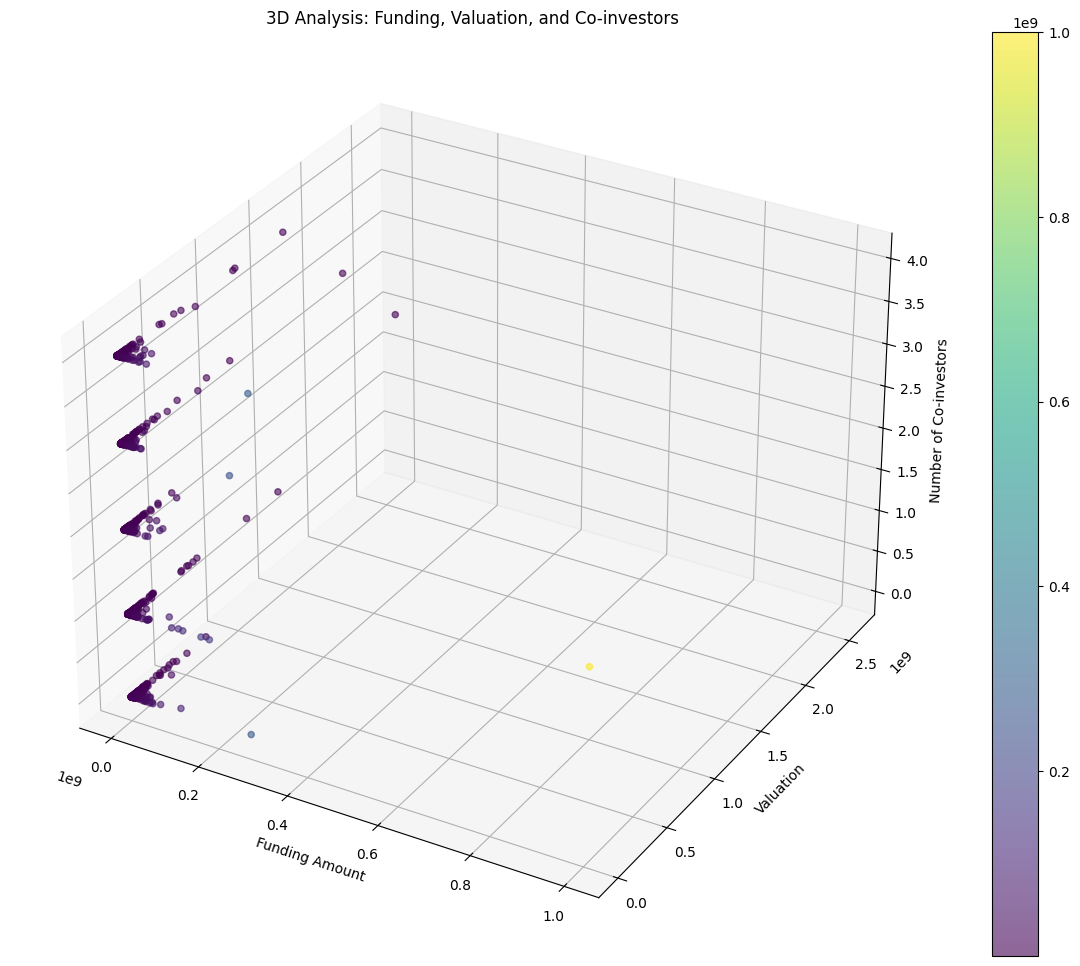

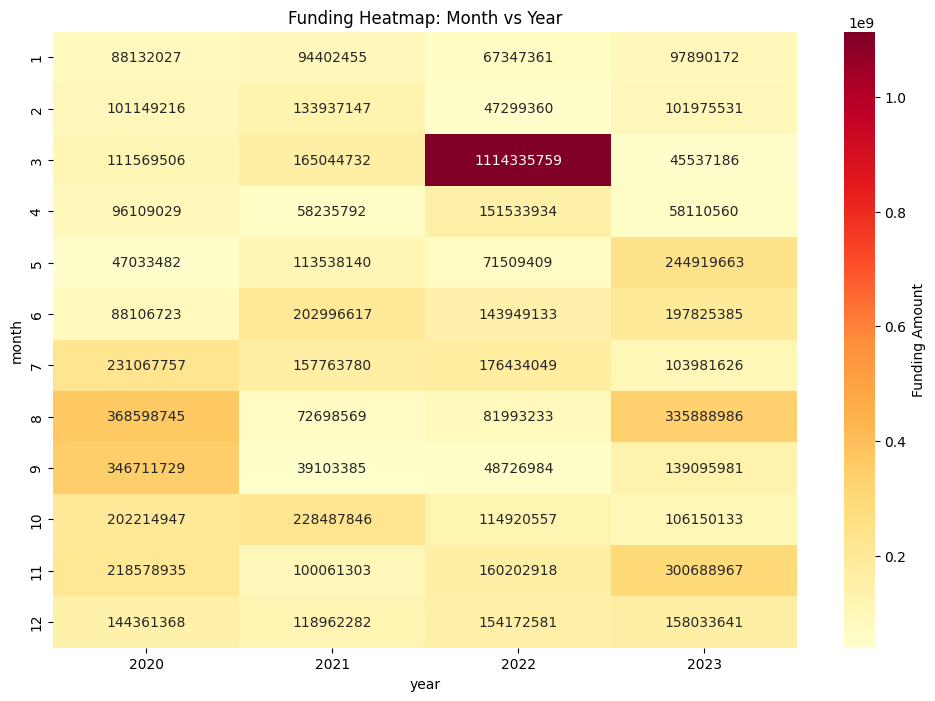

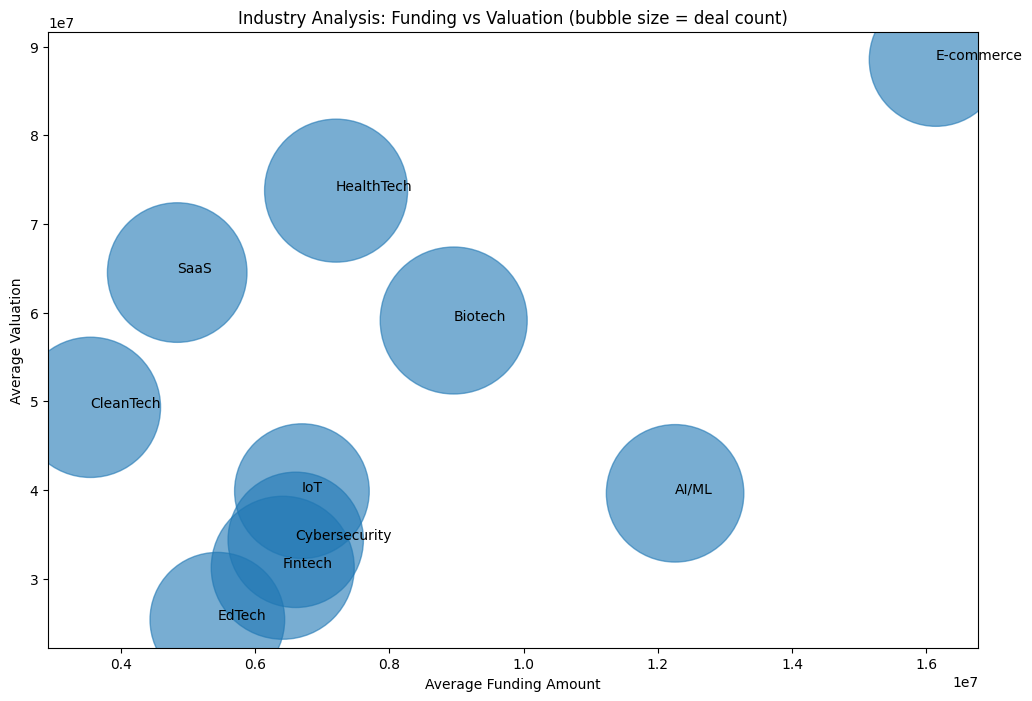

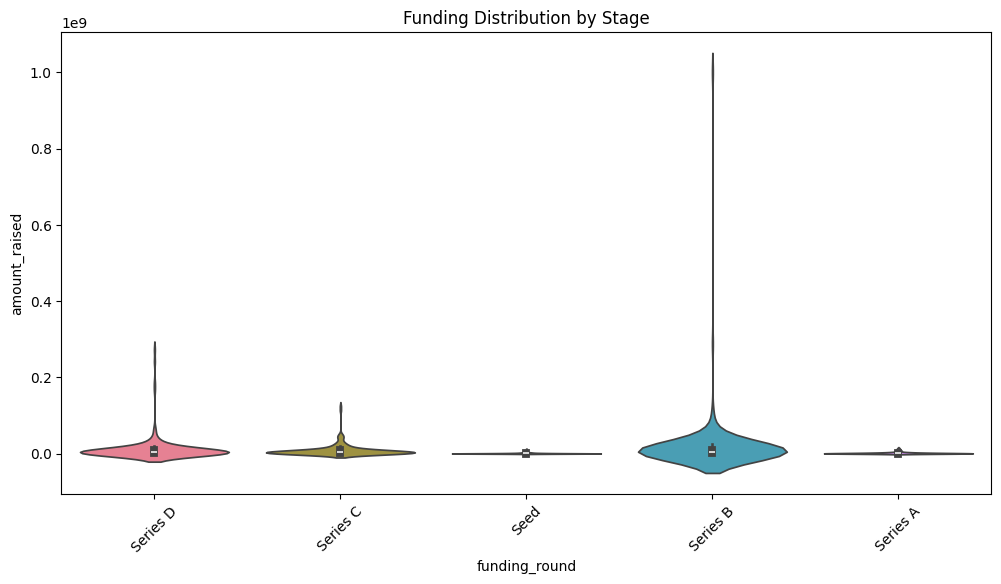

In [10]:
!pip install pandas numpy matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Data Generation Function
def generate_startup_data(num_records=1000):
    np.random.seed(42)

    # Define possible values for categorical columns
    companies = [f"Startup_{i}" for i in range(1, 101)]
    industries = ['Fintech', 'HealthTech', 'AI/ML', 'E-commerce', 'SaaS',
                 'CleanTech', 'EdTech', 'Biotech', 'Cybersecurity', 'IoT']
    locations = ['Silicon Valley', 'New York', 'London', 'Berlin', 'Singapore',
                'Tel Aviv', 'Bangalore', 'Beijing', 'Tokyo', 'Toronto']
    investors = ['VC_A', 'VC_B', 'VC_C', 'VC_D', 'Angel_1', 'Angel_2',
                'PE_Firm_1', 'PE_Firm_2', 'CVC_1', 'CVC_2']
    funding_rounds = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D']

    # Generate random data
    data = {
        'date': pd.date_range(start='2020-01-01', end='2023-12-31', periods=num_records),
        'company_name': np.random.choice(companies, num_records),
        'industry': np.random.choice(industries, num_records),
        'location': np.random.choice(locations, num_records),
        'funding_round': np.random.choice(funding_rounds, num_records),
        'amount_raised': np.random.lognormal(mean=15, sigma=1.5, size=num_records).astype(int),
        'lead_investor': np.random.choice(investors, num_records),
        'co_investors': [np.random.randint(0, 5) for _ in range(num_records)],
        'valuation': np.random.lognormal(mean=16, sigma=2, size=num_records).astype(int)
    }

    df = pd.DataFrame(data)

    # Add some realistic touches
    df['amount_raised'] = df['amount_raised'].clip(upper=1000000000)  # Cap at $1B
    df['valuation'] = df['valuation'].clip(upper=10000000000)  # Cap at $10B
    df.loc[df['funding_round'] == 'Seed', 'amount_raised'] //= 10  # Smaller seed rounds
    df.loc[df['funding_round'] == 'Series A', 'amount_raised'] //= 5  # Smaller A rounds

    return df

class StartupEcosystemAnalyzer:
    def __init__(self, data):
        self.df = data
        self.df['year'] = pd.to_datetime(self.df['date']).dt.year
        self.df['month'] = pd.to_datetime(self.df['date']).dt.month
        self.df['quarter'] = pd.to_datetime(self.df['date']).dt.quarter

    def create_advanced_visualizations(self):
        """Generate a set of advanced visualizations"""

        # 1. 3D Scatter Plot
        fig = plt.figure(figsize=(15, 12))
        ax = fig.add_subplot(111, projection='3d')

        scatter = ax.scatter(self.df['amount_raised'],
                           self.df['valuation'],
                           self.df['co_investors'],
                           c=self.df['amount_raised'],
                           cmap='viridis',
                           alpha=0.6)

        ax.set_xlabel('Funding Amount')
        ax.set_ylabel('Valuation')
        ax.set_zlabel('Number of Co-investors')
        plt.colorbar(scatter)
        plt.title('3D Analysis: Funding, Valuation, and Co-investors')
        plt.show()

        # 2. Heatmap
        pivot_data = self.df.pivot_table(
            values='amount_raised',
            index='month',
            columns='year',
            aggfunc='sum'
        )

        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_data,
                   cmap='YlOrRd',
                   annot=True,
                   fmt='.0f',
                   cbar_kws={'label': 'Funding Amount'})
        plt.title('Funding Heatmap: Month vs Year')
        plt.show()

        # 3. Bubble Plot
        industry_stats = self.df.groupby('industry').agg({
            'amount_raised': 'mean',
            'company_name': 'count',
            'valuation': 'mean'
        }).reset_index()

        plt.figure(figsize=(12, 8))
        plt.scatter(industry_stats['amount_raised'],
                   industry_stats['valuation'],
                   s=industry_stats['company_name']*100,
                   alpha=0.6)

        for i, txt in enumerate(industry_stats['industry']):
            plt.annotate(txt,
                        (industry_stats['amount_raised'].iloc[i],
                         industry_stats['valuation'].iloc[i]))

        plt.xlabel('Average Funding Amount')
        plt.ylabel('Average Valuation')
        plt.title('Industry Analysis: Funding vs Valuation (bubble size = deal count)')
        plt.show()

        # 4. Violin Plot
        plt.figure(figsize=(12, 6))
        sns.violinplot(data=self.df,
                      x='funding_round',
                      y='amount_raised',
                      palette='husl')
        plt.xticks(rotation=45)
        plt.title('Funding Distribution by Stage')
        plt.show()

        # 5. Interactive Sunburst Chart
        fig = px.sunburst(self.df,
                         path=['year', 'industry', 'funding_round'],
                         values='amount_raised',
                         title='Hierarchical View of Funding Distribution')
        fig.show()

        # 6. Radar Chart
        top_locations = self.df.groupby('location').agg({
            'amount_raised': 'sum',
            'company_name': 'count',
            'valuation': 'mean'
        }).nlargest(6, 'amount_raised')

        categories = ['Total Funding', 'Deal Count', 'Avg Valuation']

        fig = go.Figure()

        for location in top_locations.index:
            values = [
                top_locations.loc[location, 'amount_raised'],
                top_locations.loc[location, 'company_name'],
                top_locations.loc[location, 'valuation']
            ]
            # Normalize values
            values = [float(v)/max(values) for v in values]

            fig.add_trace(go.Scatterpolar(
                r=values,
                theta=categories,
                fill='toself',
                name=location
            ))

        fig.update_layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
            showlegend=True,
            title='Multi-dimensional Location Analysis'
        )
        fig.show()

    def generate_funding_network(self):
        """Generate a network visualization of investor-industry relationships"""
        investor_industry = self.df.groupby(['lead_investor', 'industry'])['amount_raised'].sum().reset_index()

        fig = go.Figure(data=[go.Sankey(
            node = dict(
                pad = 15,
                thickness = 20,
                line = dict(color = "black", width = 0.5),
                label = list(set(investor_industry['lead_investor'].tolist() +
                               investor_industry['industry'].tolist())),
                color = "blue"
            ),
            link = dict(
                source = [list(set(investor_industry['lead_investor'].tolist() +
                                 investor_industry['industry'].tolist())).index(x)
                         for x in investor_industry['lead_investor']],
                target = [list(set(investor_industry['lead_investor'].tolist() +
                                 investor_industry['industry'].tolist())).index(x)
                         for x in investor_industry['industry']],
                value = investor_industry['amount_raised']
            )
        )])

        fig.update_layout(title_text="Investor-Industry Network", font_size=10)
        fig.show()

# Generate data
df = generate_startup_data(1000)

# Create analyzer instance
analyzer = StartupEcosystemAnalyzer(df)

# Generate visualizations
print("Generating visualizations...")
analyzer.create_advanced_visualizations()
analyzer.generate_funding_network()